# Continut
## [1. Importul si explorarea datelor](#date)
## [2. Gestionarea lipsurilor](#lipsuri)
## [3. Vizualizarea datelor](#vizualizare)
## [4. Procesarea caracteristicilor (feature engineering)](#caracteristici)
## [5. Formarea seturilor de date](#seturi)
## [6. Crearea si evaluarea modelului de baza Decision Tree Classifier](#model_baza)
## [7. Vizualizarea arborelui](#arbore)
## [8. Hiper-parametrul Max Depth](#maxdepth)
## [9. Hiper-parametrul Max Leaf Nodes](#maxleafnodes)
## [10. Hiper-parametrul Criterion](#criterion)
## [11. Hiper-parametrul Min_impurity_decrease](#11)

<a id='date'></a>
# 1. Importul si explorarea datelor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# vizualizarea informației despre date df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<a id='lipsuri'></a>
# 2. Gestionarea lipsurilor

In [5]:
# verificarea datelor lipsa df.isnull().sum()
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
# excluderea datelor lipsa  df.dropna()
df=df.dropna()

In [7]:
# verificarea repetata a prezentei datelor lipsa df.isnull().sum()
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
# determinarea valorilor unice in coloanele categoriale df[col].unique()
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [10]:
# afisarea datelor unde coloana sex are valoarea '.'
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
# excludere datelor care au in coloana sex are valoarea '.'
df=df[df['sex']!='.']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


<a id='vizualizare'></a>
# 3. Vizualizarea datelor

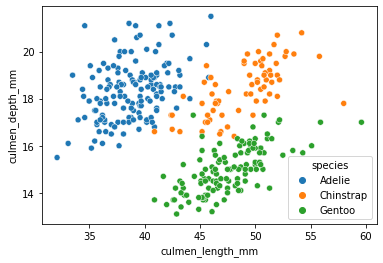

In [13]:
# vizualizarea grupării claselor label in funcție de 2 caracteristici numerice 
# sns.scatterplot(data=df, x=col1, y=col2, hue=col3)
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species');

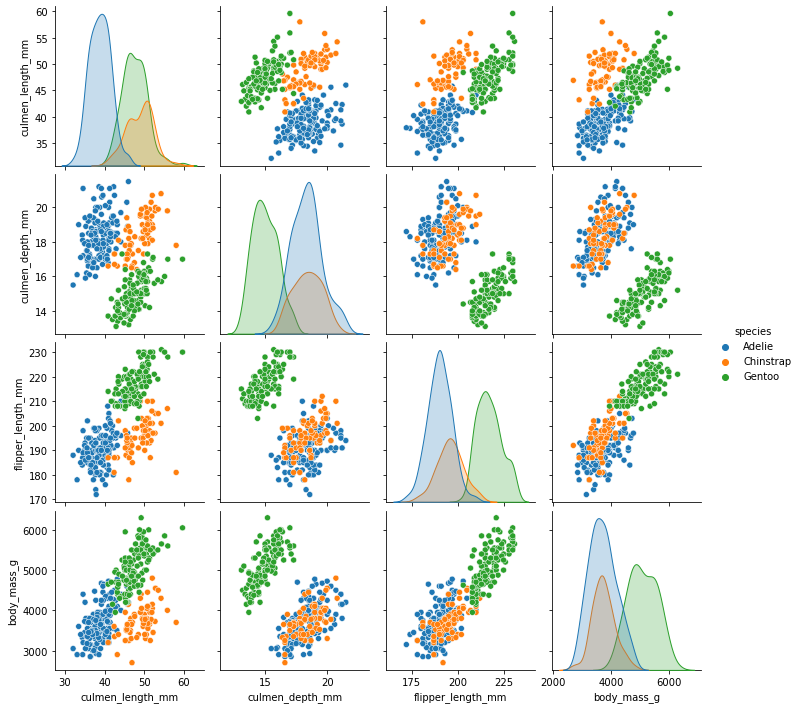

In [14]:
# vizualizarea grupării claselor label in funcție de toate caracteristicile numerice sns.pairplot(data=df, hue=col_label)
sns.pairplot(df,hue='species');

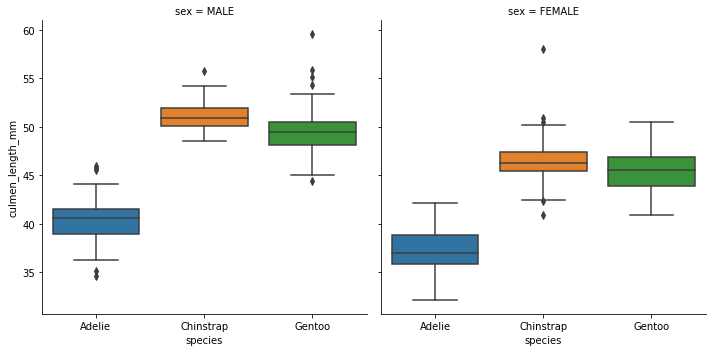

In [15]:
# vizualizarea distributie valorilor unei caracteristici numerice in functie de 2 caracteristici categoriale
# sns.catplot(data=df, x=col_cat1, y=col_num, col=col_cat2, kind=’box’)

sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex');

<a id='caracteristici'></a>
# 4. Procesarea caracteristicilor (feature engineering)

In [16]:
# transformarea tuturor coloanelor categoriale in coloane numerice pd.get_dummies(df)
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [17]:
# transformarea coloanelor categoriale ale caracteristicilor in coloane numerice cu stergera primei coloane numerice
# pd.get_dummies(df.drop(col_label,axis=1),drop_first=True)
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


<a id='seturi'></a>
# 5. Formarea seturilor de date

In [18]:
# Formarea setului X  X=df.drop(col_label, axis=1)
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)

In [19]:
# Formarea setului y  y=df[col_label]
y = df['species']

In [20]:
# importul functiei train_test_split()
from sklearn.model_selection import train_test_split

In [21]:
#crearea seturilor de train si de test 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

<a id='model_baza'></a>
# 6. Crearea si evaluarea modelului de baza Decision Tree Classifier 

In [22]:
# importul algoritmului DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [23]:
# crearea modelului DecisionTreeClassifier de bază model = DecisionTreeClassifier()
model = DecisionTreeClassifier()

In [24]:
# ajustarea modelului pe datele de training model.fit(x_train, y_train)
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# realizarea predicției model.predict(X_test)
y_pred = model.predict(X_test)

In [26]:
# importul functiilor de evaluare
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, ConfusionMatrixDisplay

In [27]:
# determinarea acurateti modelului accuracy_score(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.97

In [28]:
# determinarea confusion matrix a modelului confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)

array([[43,  2,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]], dtype=int64)

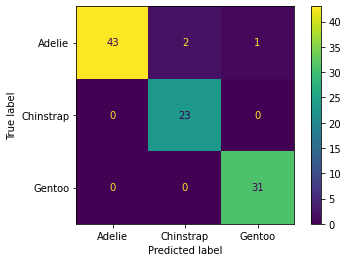

In [29]:
# vizualizarea grafica a confusion matrix a modelului plot_confusion_matrix(model,X_test,y_test)
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=model.classes_).plot()

In [30]:
# elaborarea classificasion report a modelului print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



In [31]:
# determinarea importantei fiecarei caracteristici model.feature_importances_
model.feature_importances_

array([0.35823501, 0.04125461, 0.55096018, 0.        , 0.02930107,
       0.        , 0.02024913])

In [32]:
# afisarea importantei fiecarei caracteristici in tabel
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.358235
culmen_depth_mm,0.041255
flipper_length_mm,0.550960
body_mass_g,0.000000
island_Dream,0.029301
island_Torgersen,0.000000
sex_MALE,0.020249


<a id='arbore'></a>
# 7. Vizualizarea arborelui


Informații mai detaliate: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [33]:
#Importul functiei de vizualizare a arborelui from sklearn.tree import plot_tree
from sklearn.tree import plot_tree

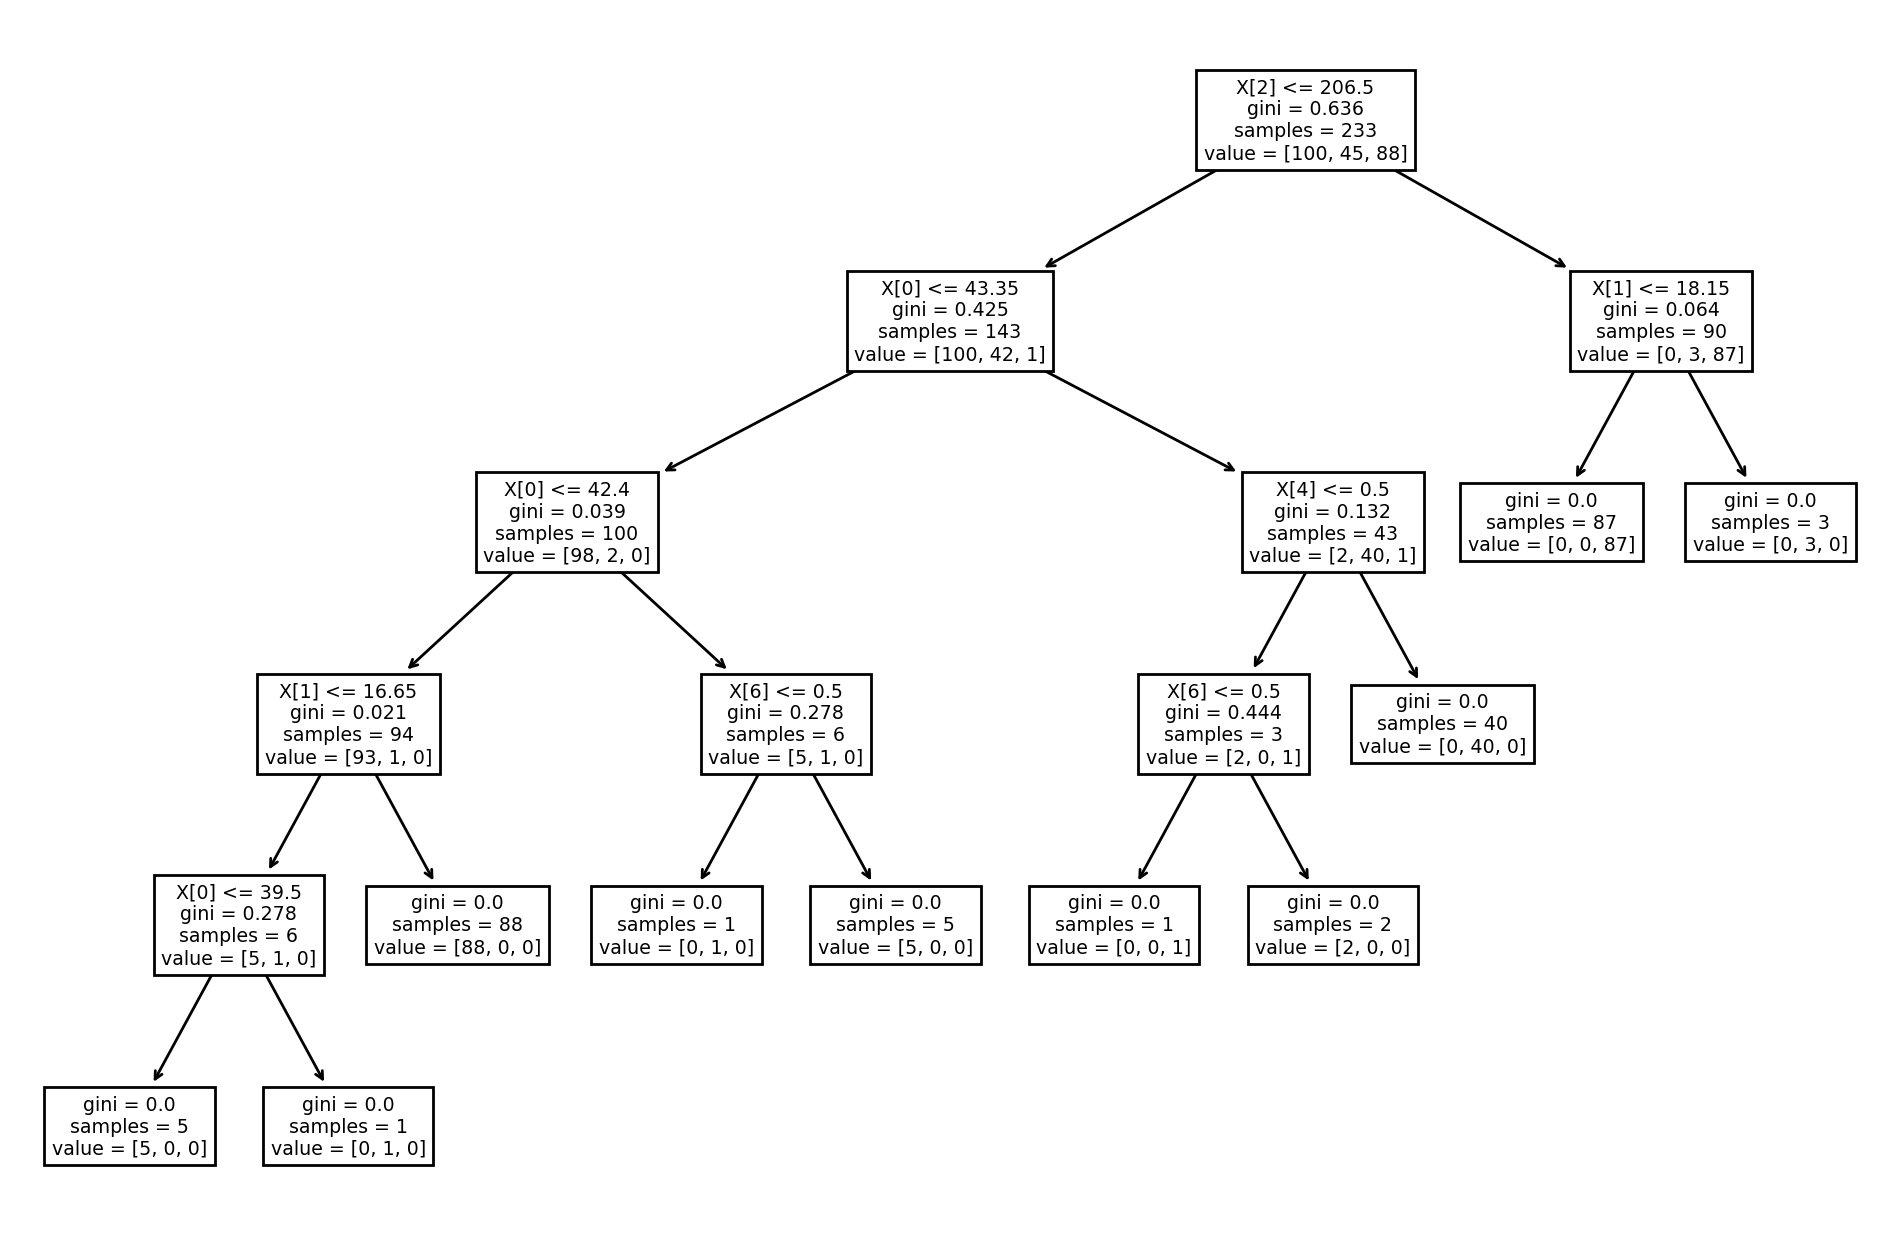

In [34]:
# vizualizarea arborelui plot_tree(model);
plt.figure(figsize=(12,8),dpi=200)
plot_tree(model);

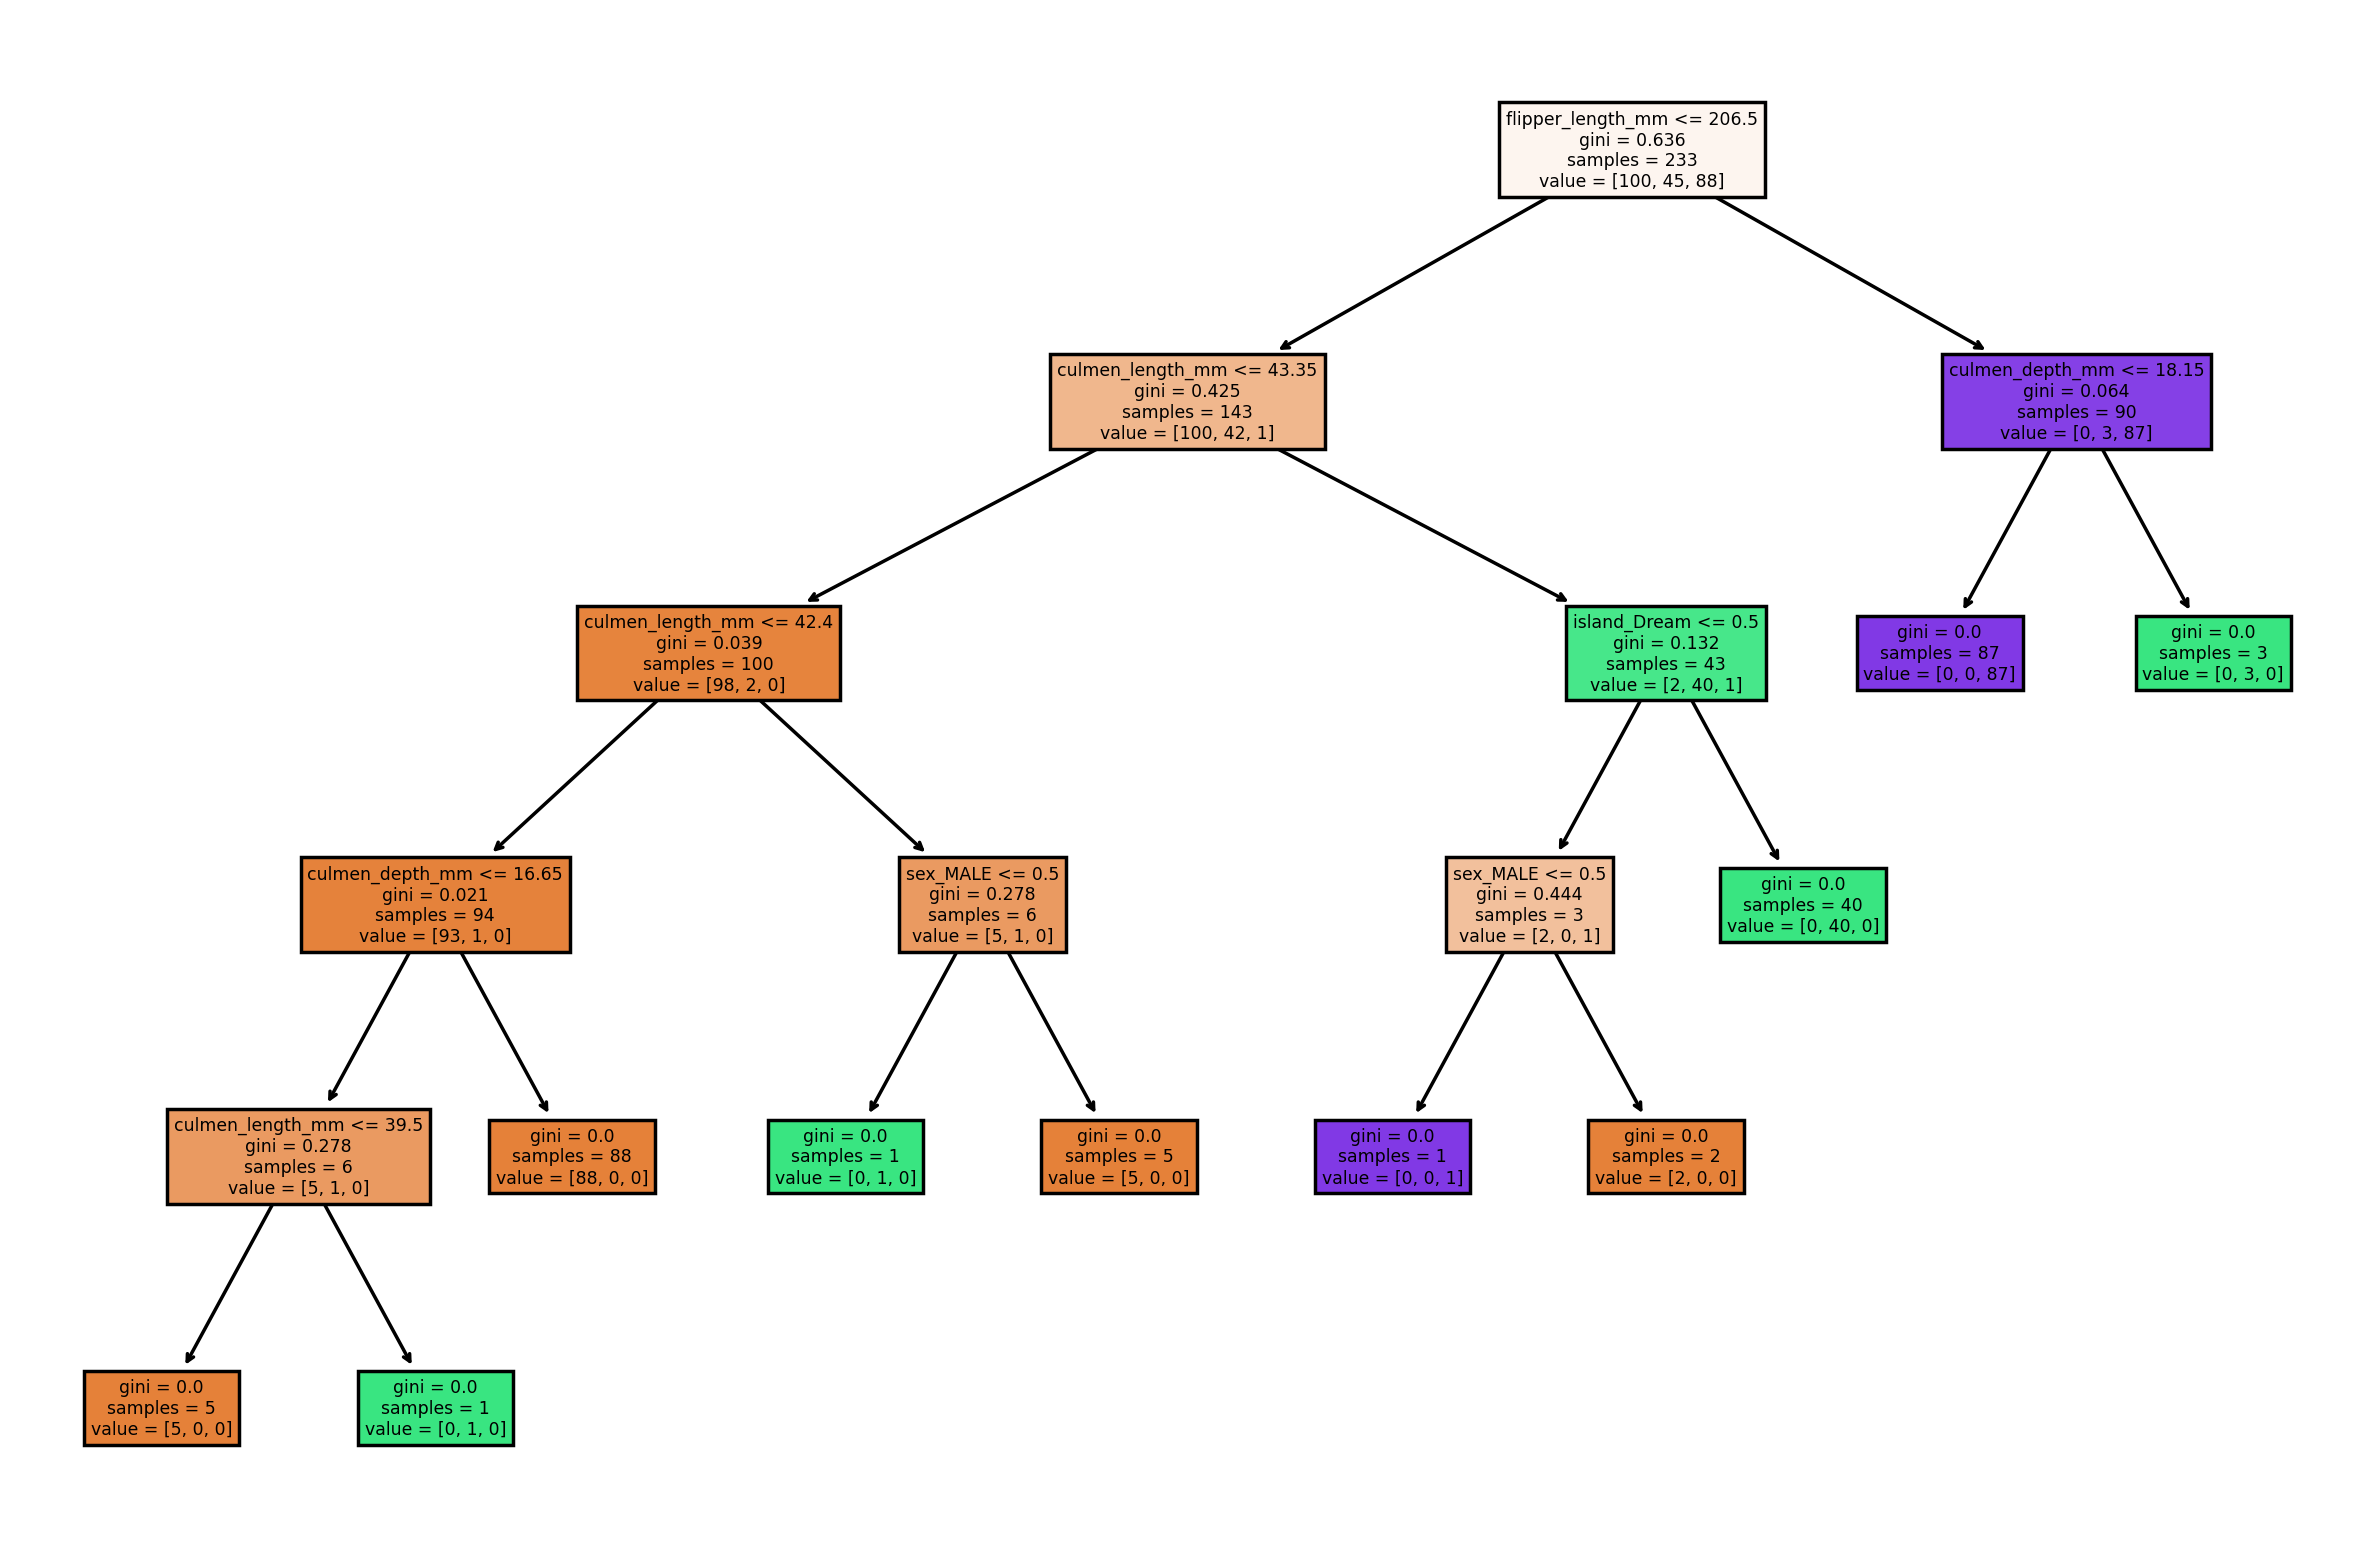

In [35]:
# parametrizarea arborelui plot_tree(model, filled=True, feature_names=X.columns);
plt.figure(figsize=(12,8),dpi=250)
plot_tree(model,filled=True,feature_names=X.columns);

In [36]:
# elaborarea unei functii de ajustare pe datele de train, realizare a predictei, evaluare si vizualizare a arborelui modelului
def raport_model(model):
    model.fit(X_train, y_train)
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=model.classes_).plot()
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



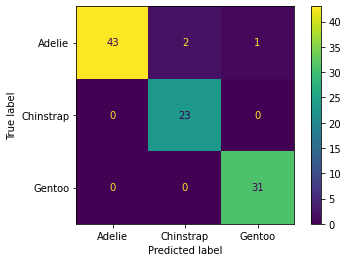

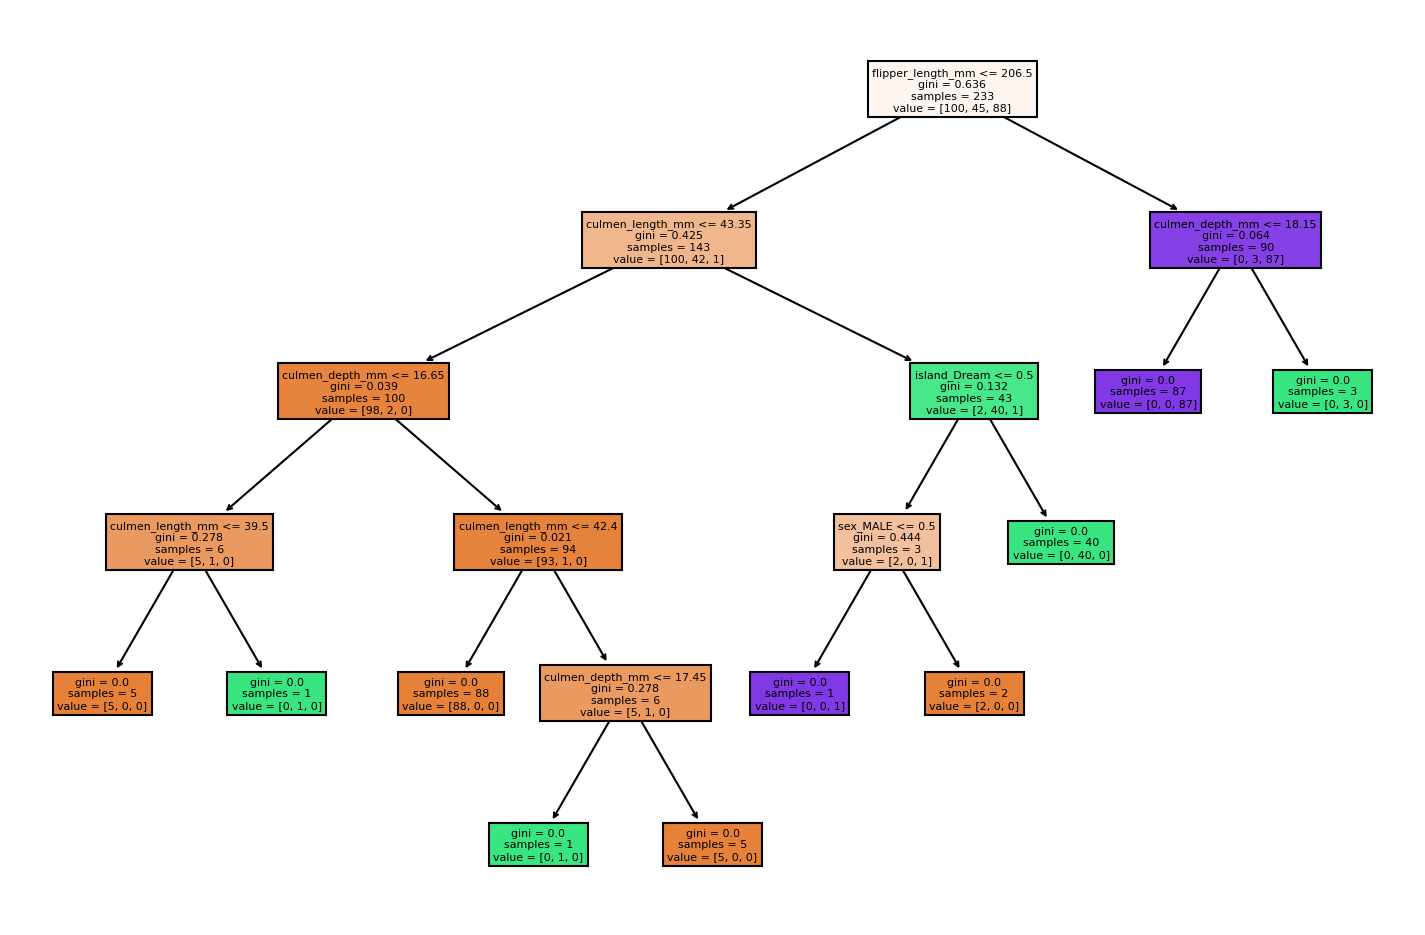

In [37]:
# apelarea functie pe modelul de bază
raport_model(model)

<a id='maxdepth'></a>
# 8. Hiper-parametrul Max Depth

In [38]:
# crearea modelului DecisionTreeClassifier cu parametru Max Depth de diferite valori 
# model = DecisionTreeClassifier(max_depth=2)
model_max_depth_2 = DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



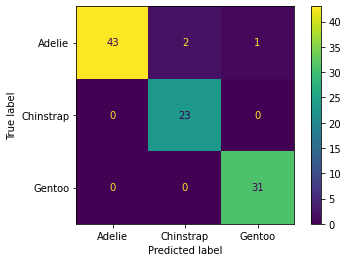

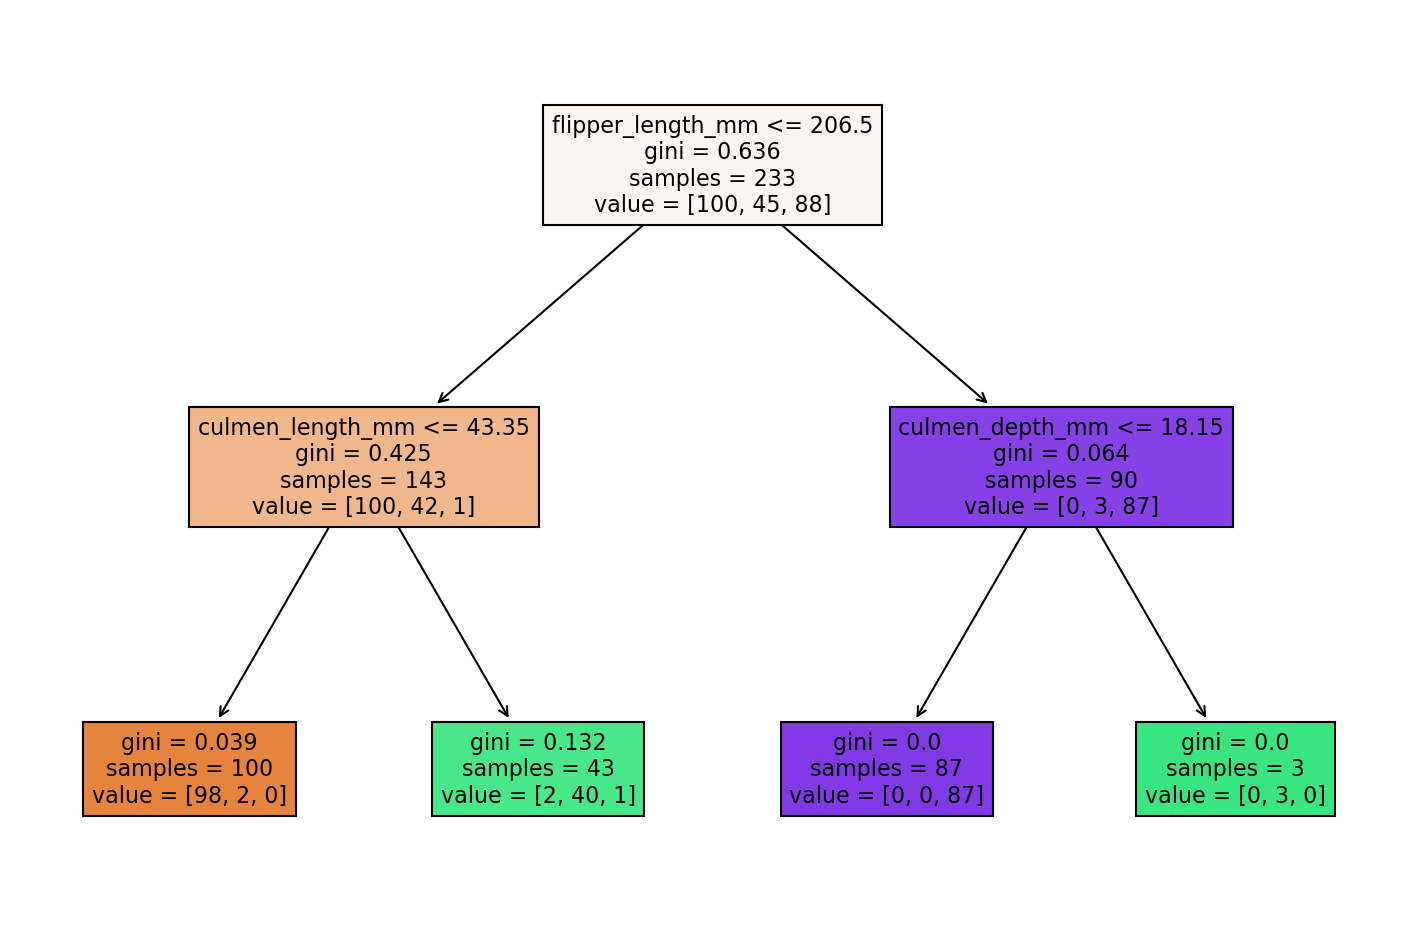

In [39]:
# apelarea functie raport_model pe modelul model_max_depth_2
raport_model(model_max_depth_2)

In [40]:
model_max_depth_3 = DecisionTreeClassifier(max_depth=3)

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        46
   Chinstrap       0.91      0.87      0.89        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.94       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100



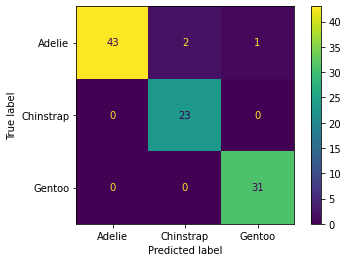

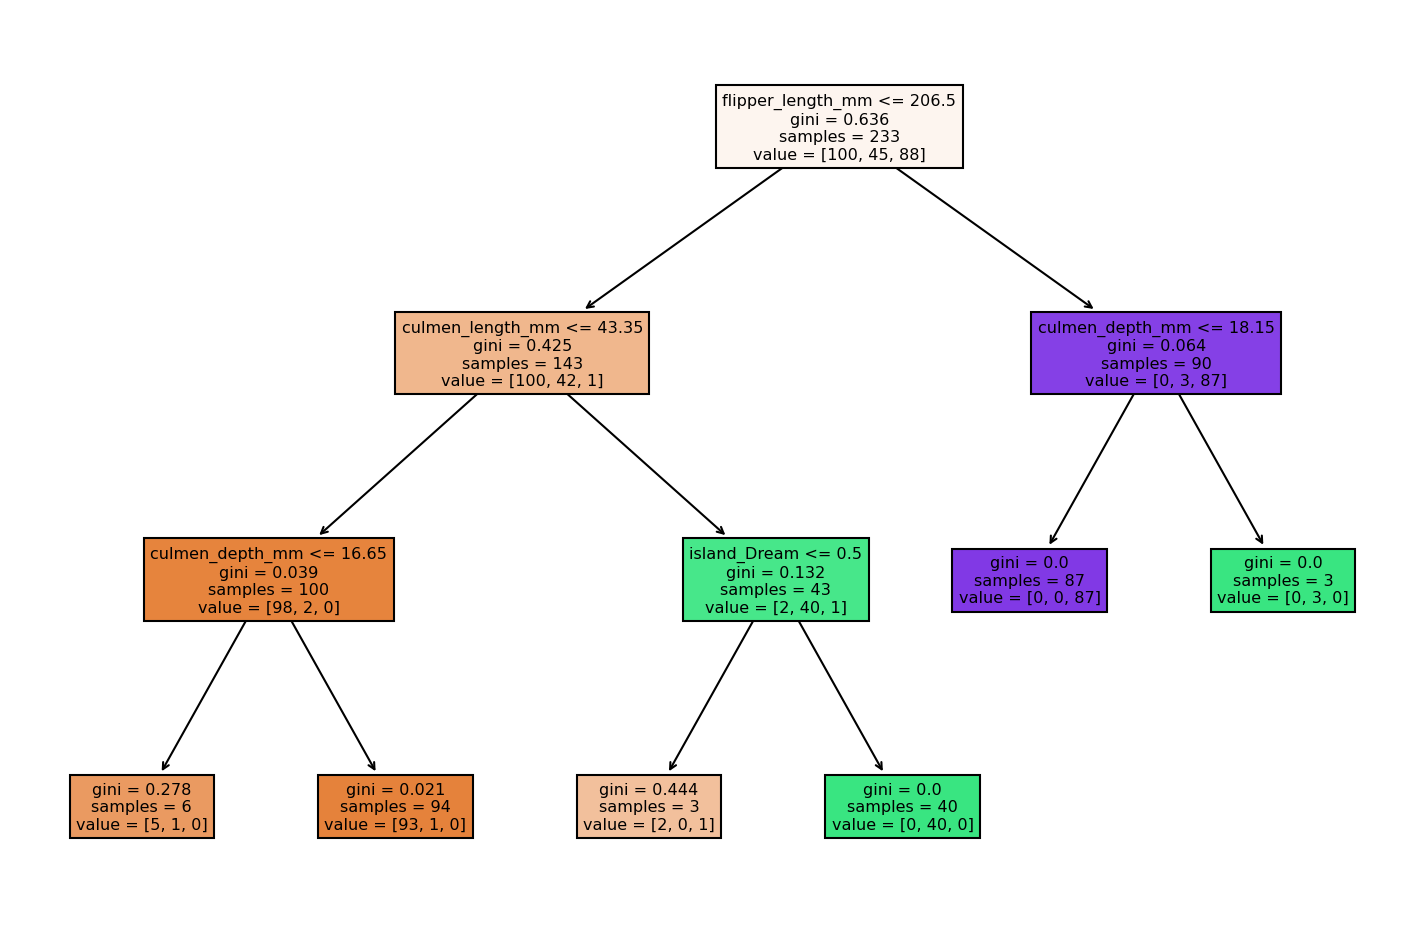

In [41]:
raport_model(model_max_depth_3)

<a id='maxleafnodes'></a>
# 9. Hiper-parametrul Max Leaf Nodes

In [42]:
#crearea modelului DecisionTreeClassifier cu parametru Max Leaf Nodes de diferite valori
# model = DecisionTreeClassifier(max_leaf_nodes=3)
model_max_leaf_nodes_3 = DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.90      0.78      0.84        23
      Gentoo       0.89      1.00      0.94        31

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



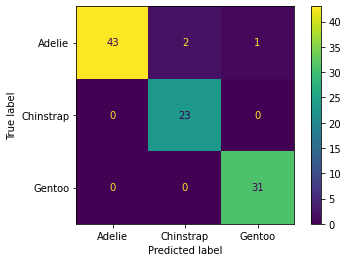

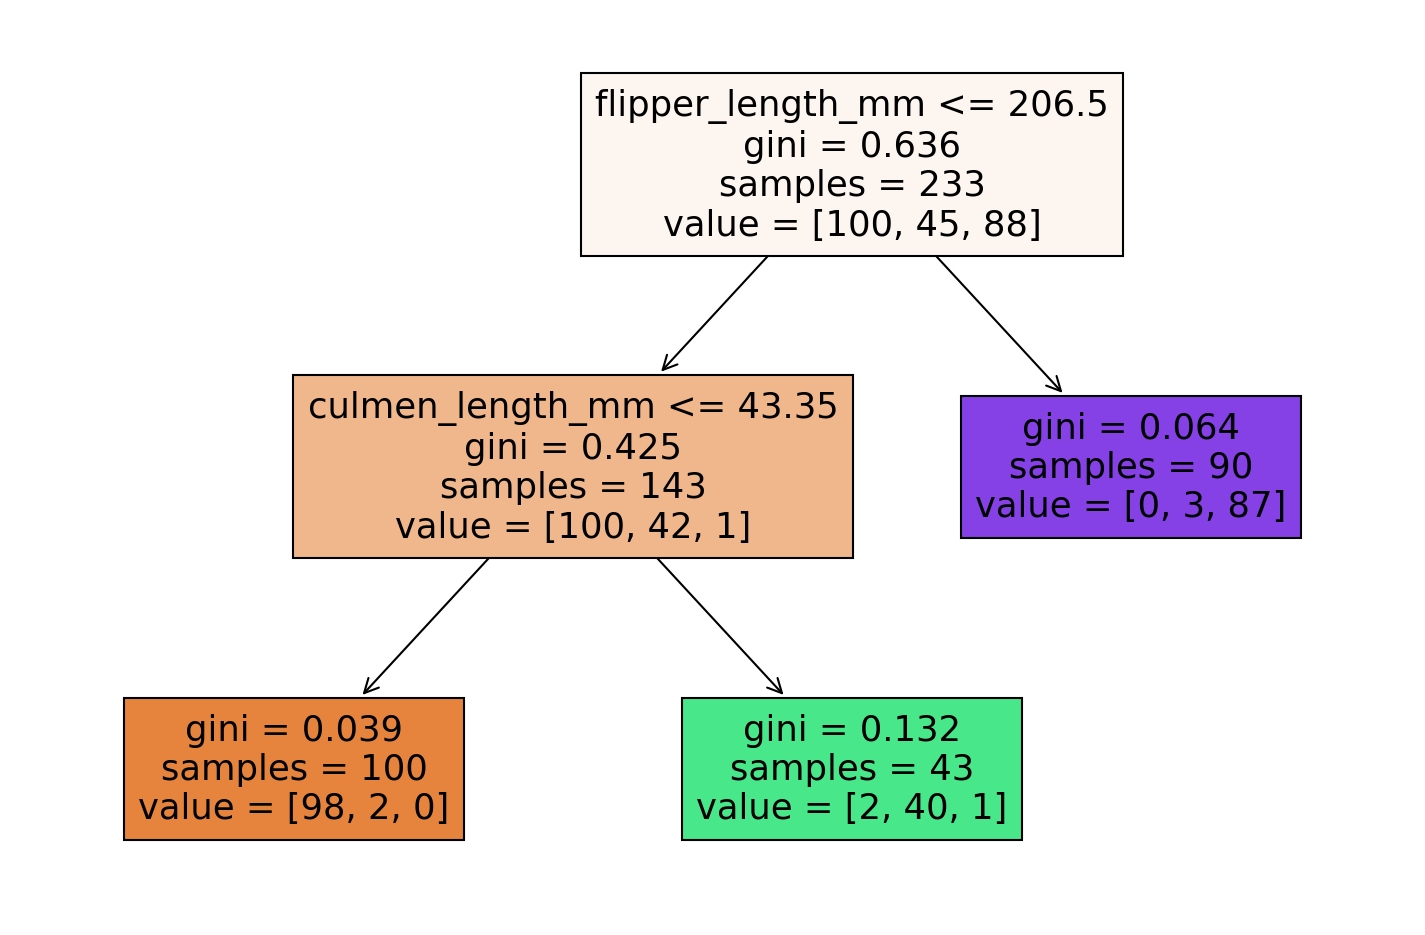

In [43]:
# apelarea functie raport_model pe modelul model_max_leaf_nodes_3
raport_model(model_max_leaf_nodes_3)

In [44]:
model_max_leaf_nodes_5 = DecisionTreeClassifier(max_leaf_nodes=5)

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        46
   Chinstrap       0.91      0.87      0.89        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.94       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100



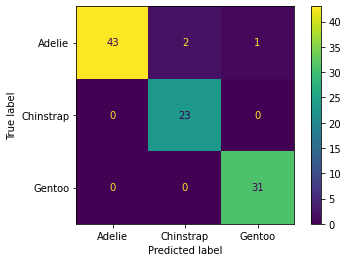

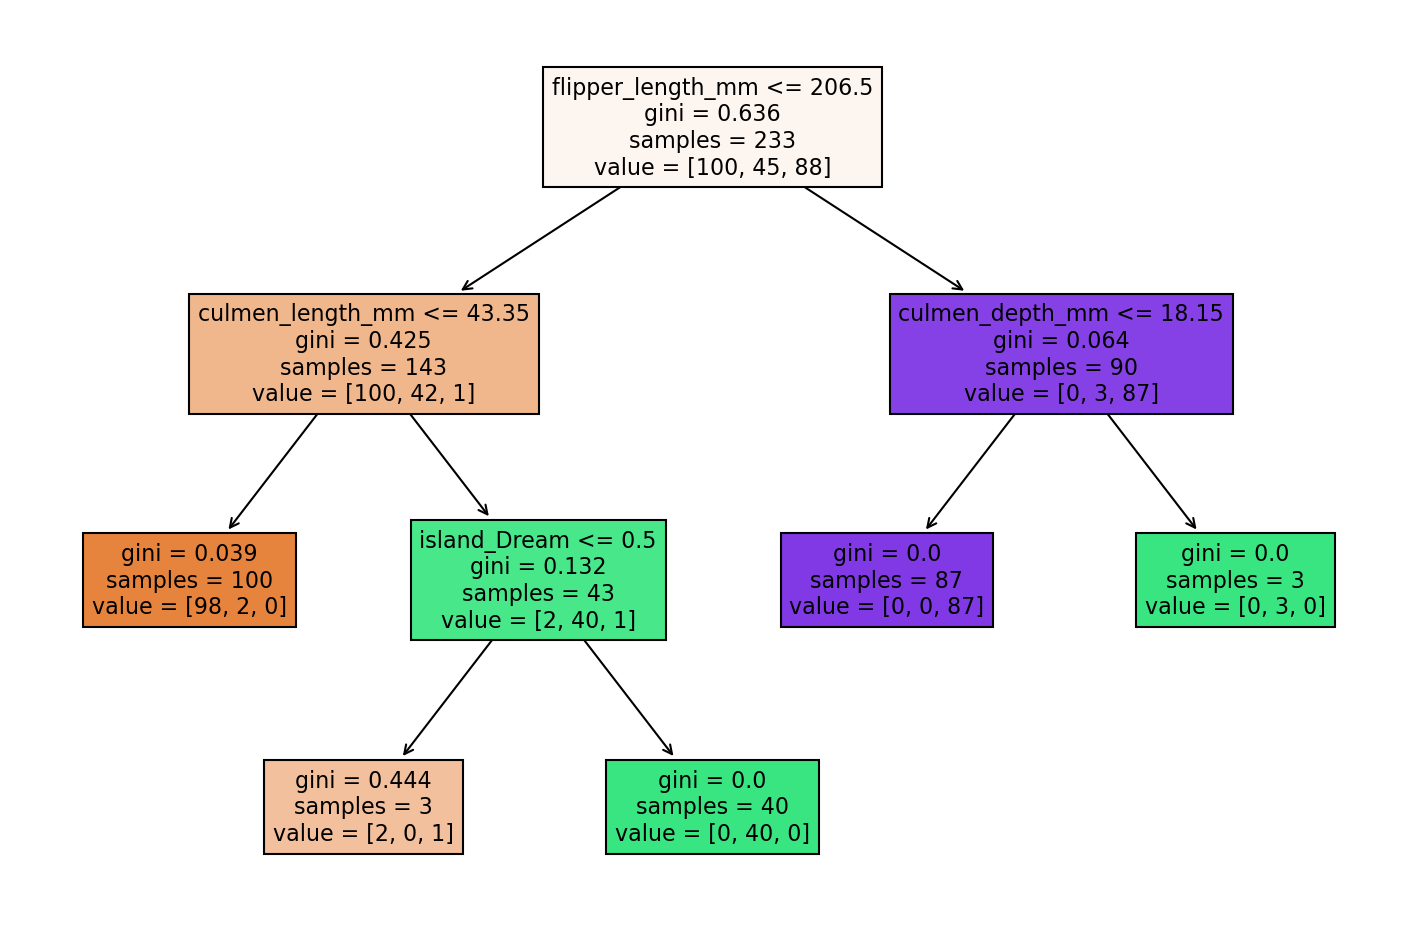

In [45]:
raport_model(model_max_leaf_nodes_5)

<a id='criterion'></a>
# 10. Hiper-parametrul Criterion

In [46]:
#crearea modelului DecisionTreeClassifier cu parametru Criterion entropy 
# model = DecisionTreeClassifier(criterion='entropy')
model_entropy = DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       1.00      0.91      0.95        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.94      1.00      0.97        31

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



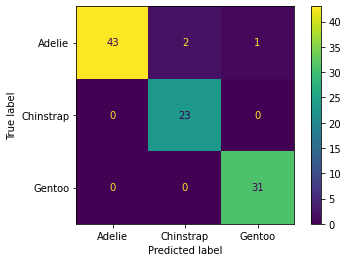

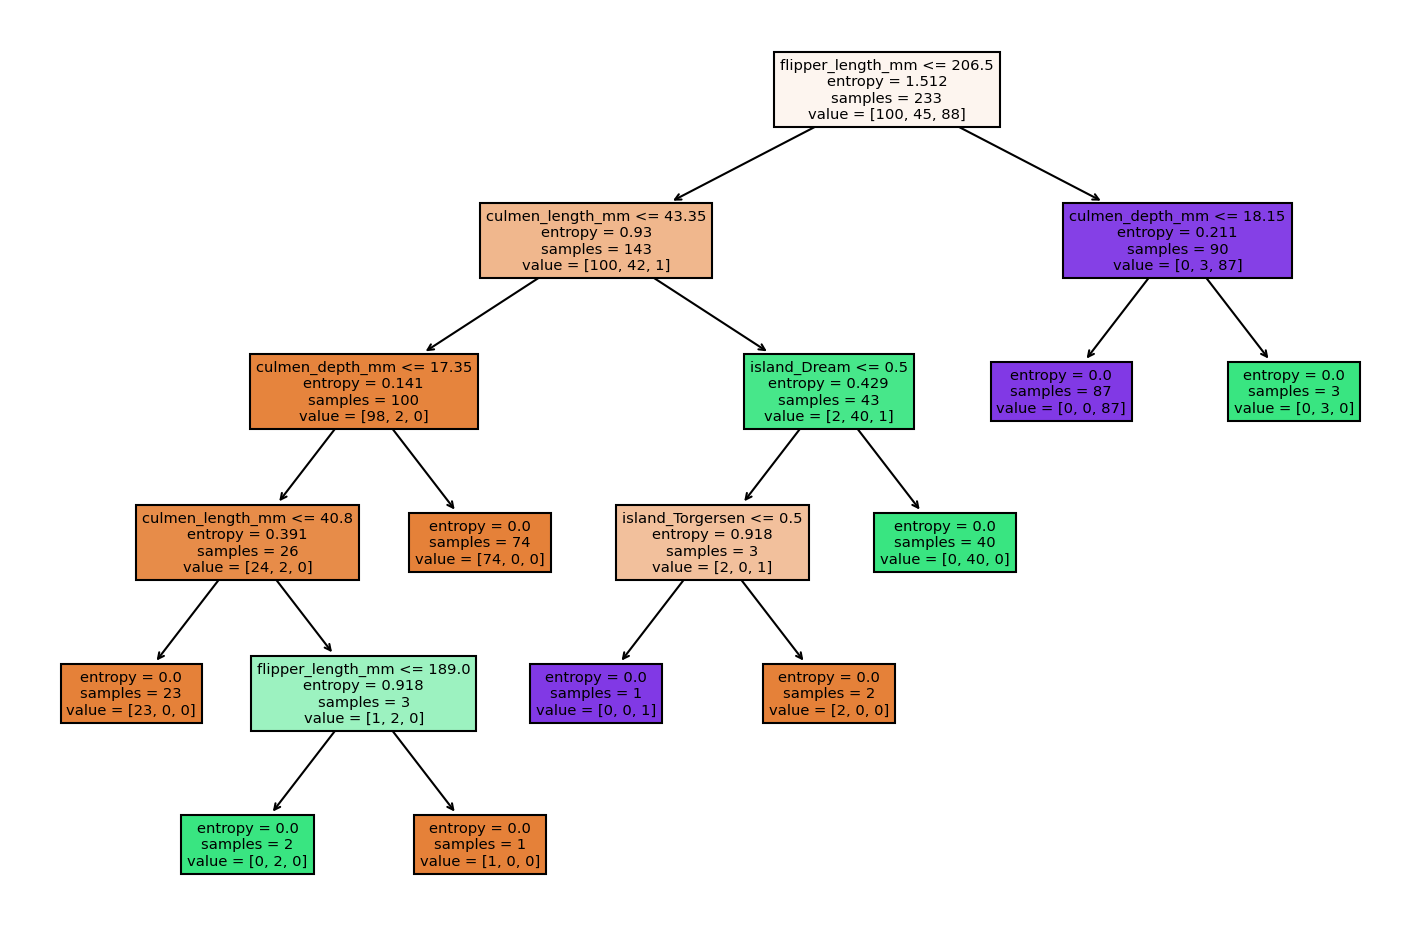

In [47]:
# apelarea functie raport_model pe modelul model_entropy
raport_model(model_entropy)

<a id='11'></a>
# 11. Hiper-parametrul Min_impurity_decrease

In [48]:
#crearea modelului DecisionTreeClassifier cu parametru min_impurity_decrease de diferite valori
# model = DecisionTreeClassifier(min_impurity_decrease =0.01)
model_min_impurity_decrease_001 = DecisionTreeClassifier(min_impurity_decrease = 0.01)

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        46
   Chinstrap       0.91      0.87      0.89        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.94       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.94      0.94      0.94       100



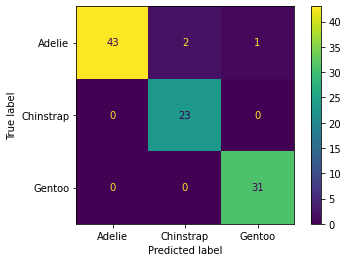

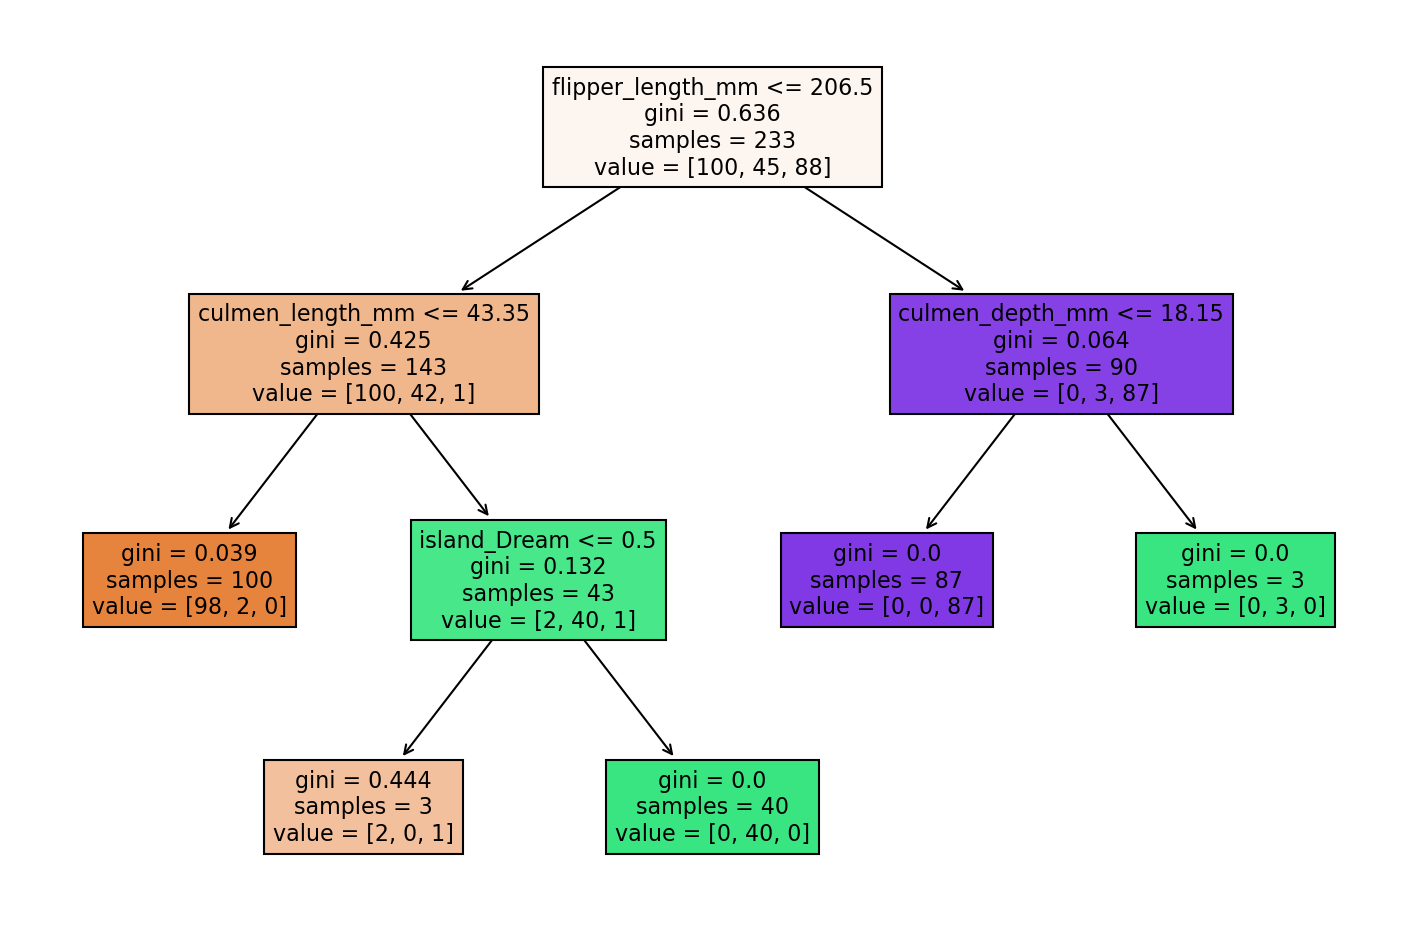

In [49]:
# apelarea functie raport_model pe modelul model_entropy
raport_model(model_min_impurity_decrease_001)

In [50]:
#crearea modelului DecisionTreeClassifier cu parametru min_impurity_decrease de diferite valori
# model = DecisionTreeClassifier(min_impurity_decrease =0.2)
model_min_impurity_decrease_02 = DecisionTreeClassifier(min_impurity_decrease = 0.02)

              precision    recall  f1-score   support

      Adelie       0.93      0.91      0.92        46
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



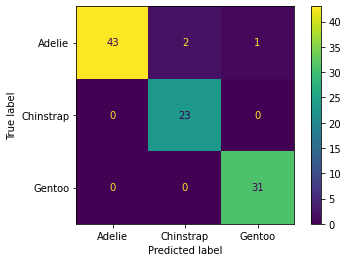

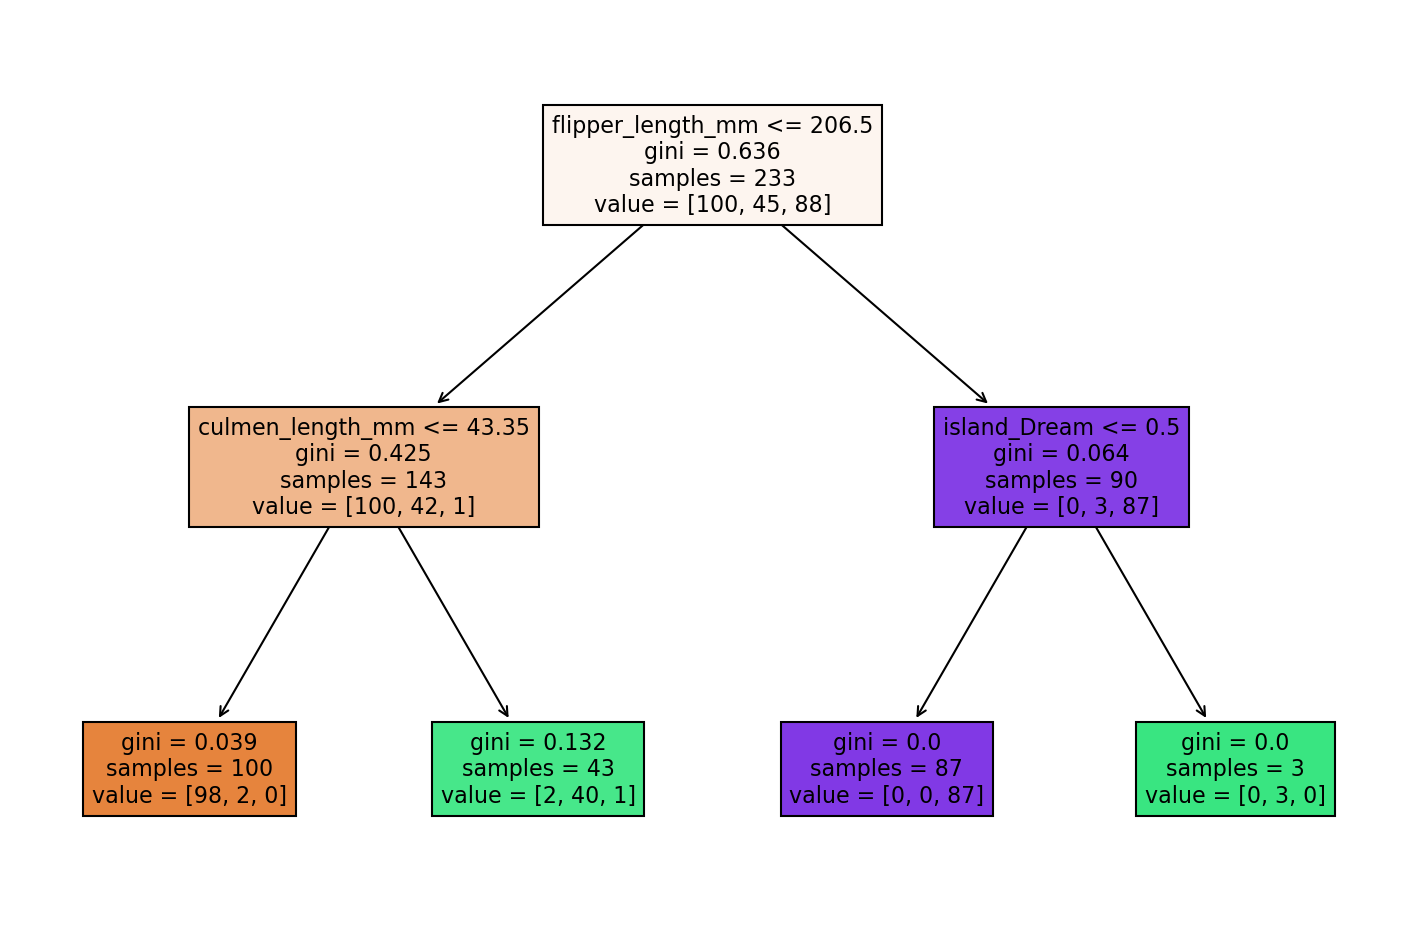

In [51]:
# apelarea functie raport_model pe modelul model_entropy
raport_model(model_min_impurity_decrease_02)